In [ ]:
%load_ext autoreload

%autoreload 2

import numpy as np
from lucifex.fdm import AB1, AM1
from lucifex.sim import run, xdmf_to_npz
from lucifex.utils import grid, spacetime_grid, cross_section
from lucifex.viz import plot_colormap, create_animation, plot_line
from lucifex.io import write

from crocodil.dns import dns_rayleigh_benard_1s


STORE = 1
WRITE = None
DIR_BASE = './data_test'
DIR_PARAMS = ('Nx', 'Ny')

simulation = dns_rayleigh_benard_1s(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
    dir_timestamp=True,
)(
    Nx=100,
    Ny=100,
    Ra=1e3,
    erf_eps=5e-2,
    # theta_limits=(0, 1),
    D_adv=AB1@AM1, 
    D_diff=AM1,
    dt_max=0.05,
    theta_stabilization=(100.0, 100.0),
    secondary=True,
)

n_stop = 200
dt_init = 0.05
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

theta, u, psi = simulation['theta', 'u', 'psi']
# thetaCorr = simulation['thetaCorr']
thetaMinMax, uMinMax, uRMS = simulation['thetaMinMax', 'uMinMax', 'uRMS']
thetaMin, thetaMax = thetaMinMax.sub(0), thetaMinMax.sub(1) 
uMax = uMinMax.sub(1)
dt, dtCFL = simulation['dt', 'dtCFL']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='$x$', ylabel='$y$'>)

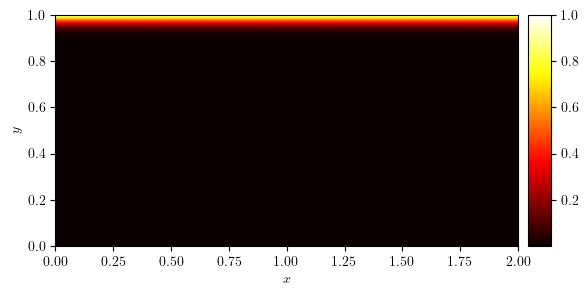

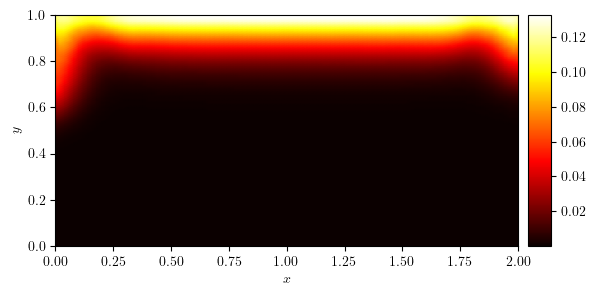

In [8]:
plot_colormap(theta.series[0])
plot_colormap(theta.series[-1])

In [ ]:
plot_colormap(theta.ics_perturbation[1])

In [ ]:
plot_line((uRMS.time_series, uRMS.value_series))